In [ ]:
!pip install -q pyicu
!pip install -q pycld2
!pip install -q polyglot
!pip install -q textstat
!pip install -q googletrans
!pip install colorama
!pip3 install pyicu
!pip3 install pycld2
!pip3 install morfessor
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import folium
import textstat
from scipy import stats
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

import nltk
from textblob import TextBlob

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from googletrans import Translator
from nltk import WordNetLemmatizer
from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stopword=set(STOPWORDS)

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Hello-SimpleAI/HC3", name='all')
dataset1 = dataset['train'].to_pandas()
dataset1

def process_dataset(dataset):
    human = dataset[['human_answers']].rename(columns={'human_answers':'text'})
    human['text'] = human['text'].apply(lambda x: ''.join(x))
    human['generated'] = 0

    ai = dataset[['chatgpt_answers']].rename(columns={'chatgpt_answers':'text'})
    ai['text'] = ai['text'].apply(lambda x: ''.join(x))
    ai['generated'] = 1

    clean_data = pd.concat((human, ai), axis=0, ignore_index=True)

    clean_data = clean_data[clean_data['text'] != '']

    return clean_data

data1 = process_dataset(dataset1)

In [ ]:
dataset2 = pd.read_csv("/content/drive/MyDrive/DS301GroupProject/train_v2_drcat_02.csv")
def process_dataset2(dataset):
    dataset.drop(['prompt_name', 'source', 'RDizzl3_seven'], axis=1, inplace=True)
    dataset.rename(columns={'label': 'generated'}, inplace=True)
    return dataset

data2 = process_dataset2(dataset2)

In [ ]:
def clean(text):
    text = text.fillna("fillna").str.lower()
    text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

data1["text"] = clean(data1["text"])
data2["text"] = clean(data2["text"])

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)
data

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

### Bert

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=240, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []

    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer.save_pretrained('./distilbert_base_uncased_tokenizer/')

In [ ]:
from transformers import BertTokenizer
def fast_encode(texts, tokenizer, maxlen=512):
    # The batch_encode_plus method handles padding and truncation
    encoded = tokenizer.batch_encode_plus(
        texts,
        return_attention_mask=False,
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen,
        truncation=True
    )

    return np.array(encoded['input_ids'])

In [ ]:
data_encoded = fast_encode(data.text.astype(str), tokenizer, maxlen=512)

In [ ]:
encoded_texts_bert = data_encoded

In [ ]:
import csv
filename = 've_distilbert-base-uncased_data.csv'

# Writing to the CSV file
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_encoded)

print(f'{filename} has been created and exported successfully.')

ve_distilbert-base-uncased_data.csv has been created and exported successfully.


### Load Datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(encoded_texts_bert, data['generated'], test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [ ]:
BATCH_SIZE = 32
AUTO = tf.data.experimental.AUTOTUNE

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_val, y_val))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)

## LSTM Model


In [ ]:
class AttentionWeightedAverage(Layer):

    def __init__(self, return_attention=False, **kwargs):
        self.init = initializers.get('uniform')
        self.supports_masking = True
        self.return_attention = return_attention
        super(AttentionWeightedAverage, self).__init__(** kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(ndim=3)]
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[2], 1),
                                 name='{}_W'.format(self.name),
                                 initializer=self.init)
        super(AttentionWeightedAverage, self).build(input_shape)

    def call(self, x, mask=None):
        logits = K.dot(x, self.W)
        x_shape = K.shape(x)
        logits = K.reshape(logits, (x_shape[0], x_shape[1]))
        ai = K.exp(logits - K.max(logits, axis=-1, keepdims=True))

        if mask is not None:
            mask = K.cast(mask, K.floatx())
            ai = ai * mask
        att_weights = ai / (K.sum(ai, axis=1, keepdims=True) + K.epsilon())
        weighted_input = x * K.expand_dims(att_weights)
        result = K.sum(weighted_input, axis=1)
        if self.return_attention:
            return [result, att_weights]
        return result

    def get_output_shape_for(self, input_shape):
        return self.compute_output_shape(input_shape)

    def compute_output_shape(self, input_shape):
        output_len = input_shape[2]
        if self.return_attention:
            return [(input_shape[0], output_len), (input_shape[0], input_shape[1])]
        return (input_shape[0], output_len)

    def compute_mask(self, input, input_mask=None):
        if isinstance(input_mask, list):
            return [None] * len(input_mask)
        else:
            return None

In [ ]:
def build_lstm_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")

    embed = transformer.weights[0].numpy()
    embedding = Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(input_word_ids)

    embedding = SpatialDropout1D(0.3)(embedding)

    lstm_1 = LSTM(128, return_sequences=True)(embedding)
    lstm_2 = LSTM(128, return_sequences=True)(lstm_1)

    attention = AttentionWeightedAverage()(lstm_2)
    conc = Dense(64, activation='relu')(attention)
    conc = Dense(1, activation='softmax')(conc)

    model = Model(inputs=input_word_ids, outputs=conc)

    model.compile(Adam(lr=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
with strategy.scope():
    transformer_layer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased')
    model_lstm = build_lstm_model(transformer_layer, max_len=512)

model_lstm.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer  [(None, 512)]             0         
 )                                                               
                                                                 
 embedding_2 (Embedding)     (None, 512, 768)          91812096  
                                                                 
 spatial_dropout1d_2 (Spati  (None, 512, 768)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 512, 128)          459264    
                                                                 
 lstm_3 (LSTM)               (None, 512, 128)          131584    
                                                                 
 attention_weighted_average  (None, 128)               128 

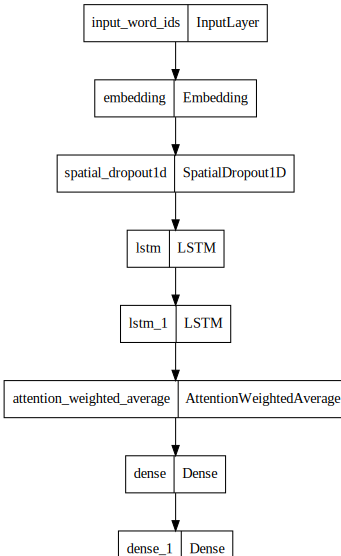

In [ ]:
SVG(tf.keras.utils.model_to_dot(model_lstm, dpi=70).create(prog='dot', format='svg'))

## Training and Testing

In [ ]:
def callback():
    cb = []

    reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.3, patience=3,
                                    verbose=1, mode='auto',
                                    epsilon=0.0001, cooldown=1, min_lr=0.000001)
    cb.append(reduceLROnPlat)
    log = CSVLogger('log.csv')
    cb.append(log)

    RocAuc = RocAucEvaluation(validation_data=(x_val, y_val), interval=1)
    cb.append(RocAuc)

    return cb

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional


model2 = Sequential()
# model2.add(Embedding(vocab_size,
#                      embedding_dim,
#                      input_length = max_len))
embed = transformers.TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased').weights[0].numpy()
model2.add(Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")))
model2.add(Bidirectional(LSTM(128, return_sequences = False)))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


TypeError: The added layer must be an instance of class Layer. Received: layer=KerasTensor(type_spec=TensorSpec(shape=(None, 512, 768), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity:0', description="created by layer 'embedding'") of type <class 'keras.src.engine.keras_tensor.KerasTensor'>.

In [ ]:
N_STEPS = x_train.shape[0] // BATCH_SIZE
EPOCHS = 5
history = model2.fit(train_dataset,
                     y_train,
                     steps_per_epoch=N_STEPS,
                     validation_data=valid_dataset,
                     callbacks = calls,
                     epochs=EPOCHS)

In [ ]:
N_STEPS = x_train.shape[0] // BATCH_SIZE
calls = callback()
EPOCHS = 5
train_history = model_lstm.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=EPOCHS
)

Epoch 1/5
1744/1744 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.8375
 ROC-AUC - epoch: 1 - score: 0.991409
1744/1744 [==============================] - 1186s 679ms/step - loss: 0.3333 - accuracy: 0.8375 - val_loss: 0.1308 - val_accuracy: 0.9483 - lr: 0.0010
Epoch 2/5
1744/1744 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9580
 ROC-AUC - epoch: 2 - score: 0.996784
1744/1744 [==============================] - 1197s 686ms/step - loss: 0.1129 - accuracy: 0.9580 - val_loss: 0.0693 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 3/5
1744/1744 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9732
 ROC-AUC - epoch: 3 - score: 0.997491
1744/1744 [==============================] - 1206s 692ms/step - loss: 0.0757 - accuracy: 0.9732 - val_loss: 0.0579 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 4/5
1744/1744 [==============================] - ETA: 0s - loss: 0.0564 - accuracy: 0.9802
 ROC-AUC - epoch: 4 - score: 0.998217
1744/17

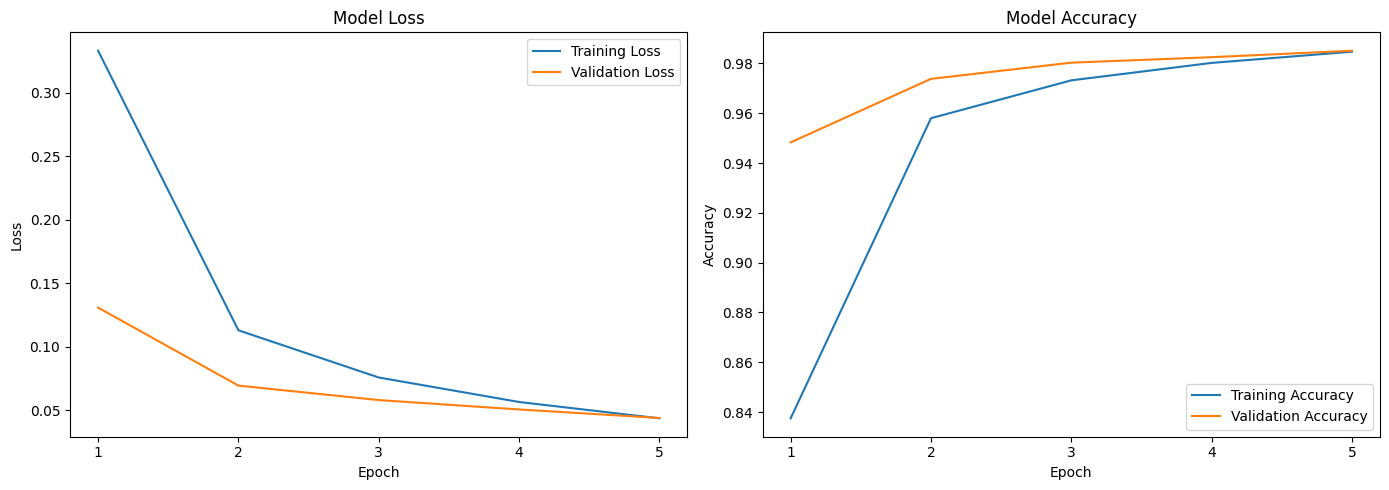

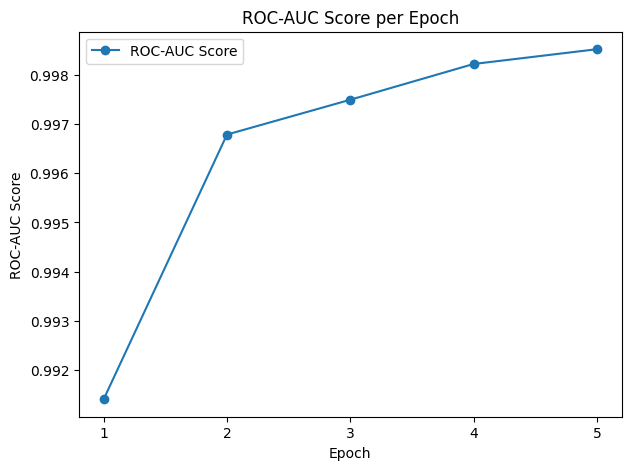

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = [1, 2, 3, 4, 5]
training_loss = [0.3333, 0.1129, 0.0757, 0.0564, 0.0435]
validation_loss = [0.1308, 0.0693, 0.0579, 0.0505, 0.0438]
training_accuracy = [0.8375, 0.9580, 0.9732, 0.9802, 0.9847]
validation_accuracy = [0.9483, 0.9738, 0.9803, 0.9825, 0.9851]
roc_auc_scores = [0.991409, 0.996784, 0.997491, 0.998217, 0.998517]

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(epochs, roc_auc_scores, label='ROC-AUC Score', marker='o')
plt.title('ROC-AUC Score per Epoch')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.legend()
plt.show()

In [ ]:
model_path = '/content/drive/My Drive/DS301GroupProject/model_lstm'
model_lstm.save(model_path, save_format='tf')

In [ ]:
test_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 512), dtype=tf.int64, name=None)>

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
test_loss, test_accuracy = model_lstm.evaluate(test_dataset)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

291/291 [==============================] - 108s 371ms/step - loss: 0.0405 - accuracy: 0.9873
Test loss: 0.04047568142414093
Test accuracy: 0.9873193502426147


In [ ]:
test_predictions_lstm = model_lstm.predict(test_dataset)

test_predictions_lstm

291/291 [==============================] - 107s 367ms/step


array([[1.4309236e-03],
       [2.7315005e-05],
       [9.8244119e-01],
       ...,
       [3.7649914e-04],
       [1.5941071e-03],
       [6.6223284e-03]], dtype=float32)

## Generalization Test

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/DS301GroupProject/tweepfake_deepfake_text_detection_test.csv'
datatweep = pd.read_csv(file_path, sep=';')

In [ ]:
filtered_datatweep = datatweep.loc[datatweep['class_type'] == 'human', ['text', 'class_type']]
filtered_datatweep.rename(columns={'class_type': 'generated'}, inplace=True)
filtered_datatweep['generated'] = 0
filtered_datatweep

,text,generated
0,justin timberlake really one of the goats if y...,0
1,Thank you @PMBhutan for your gracious prayers ...,0
2,Theory: the number of red lights you will hit ...,0
4,Might give the BASIC #10Liner game contest ano...,0
7,I Wanna See Some Rainbows Out There Boys,0
...,...,...
2550,Took stock of the situation in the wake of cyc...,0
2552,"#NowPlaying ""Uno Dos (feat. Jaden)"" by ¿Téo? i...",0
2554,Love the Choose your own adventure style of th...,0
2556,These deeply discounted 256GB SanDisk flash dr...,0


In [ ]:
file_path2 = '/content/drive/MyDrive/DS301GroupProject/train_essays_v1.csv'
gemini = pd.read_csv(file_path2, sep=';')
gemini.rename(columns={'text,label,prompt_name,source,RDizzl3_seven': 'text'}, inplace=True)
gemini['generated'] = 1
gemini

,text,generated
0,The Electoral College is a complex system that...,1
1,"The exploration of Venus, Earth's closest plan...",1
2,## Does the Electoral College Work?\n\nThe Ele...,1
3,"In the vast realm of literature, there exists ...",1
4,"In the realm of modern transportation, the adv...",1
...,...,...
3495,"The Electoral College, a distinctive feature o...",1
3496,The Electoral College is a system of indirect ...,1
3497,"The electoral College, an integral part of the...",1
3498,"The Electoral College, a distinctive feature o...",1


In [ ]:
gemini_test_df = pd.concat([filtered_datatweep, gemini], ignore_index=True)
gemini_test_df

,text,generated
0,justin timberlake really one of the goats if y...,0
1,Thank you @PMBhutan for your gracious prayers ...,0
2,Theory: the number of red lights you will hit ...,0
3,Might give the BASIC #10Liner game contest ano...,0
4,I Wanna See Some Rainbows Out There Boys,0
...,...,...
4773,"The Electoral College, a distinctive feature o...",1
4774,The Electoral College is a system of indirect ...,1
4775,"The electoral College, an integral part of the...",1
4776,"The Electoral College, a distinctive feature o...",1


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000)
features = gemini_test_df['text'].values
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
max_len = 512
padded_sequences_gemini = pad_sequences(sequences, maxlen=max_len, padding='post')
labels_gemini = gemini_test_df['generated'].values
print("Padded Sequences Shape:", padded_sequences_gemini.shape)
print("Labels Shape:", labels_gemini.shape)
test_dataset_gemini = tf.data.Dataset.from_tensor_slices((padded_sequences_gemini, labels_gemini)).batch(32)

Padded Sequences Shape: (4778, 512)
Labels Shape: (4778,)


In [ ]:
# Check the length of sequences to decide on a potentially lower maxlen
sequence_lengths = [len(seq) for seq in sequences]
print("Average sequence length:", np.mean(sequence_lengths))
print("Max sequence length:", np.max(sequence_lengths))

# Adjust maxlen according to the distribution
padded_sequences = pad_sequences(sequences, maxlen=300, padding='post')  # Example adjustment


Average sequence length: 19.664190774042222
Max sequence length: 284


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.backend import clear_session
clear_session()
model_lstm = load_model(model_lstm_path)

In [ ]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(test_dataset_gemini)

print("LSTM Model Test Accuracy:", accuracy_lstm)

150/150 [==============================] - 5s 22ms/step - loss: 3.0526 - accuracy: 0.2675
LSTM Model Test Accuracy: 0.2674759328365326
